In [37]:
import time

In [38]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial import Delaunay

# def generate_and_save_triangulation(ind,num_points=100):
#     # Generowanie losowych punktów
#     np.random.seed()
#     points = np.random.rand(num_points, 2)  # Generowanie określonej liczby punktów w 2D

#     # Tworzenie triangulacji
#     tri = Delaunay(points)

#     # Zapis punktów do pliku
#     with open('test' + ind + 'points' , 'w') as file:
#         for point in points:
#             file.write(f"{point[0]} {point[1]}\n")

#     # Zapis trójkątów do pliku
#     with open('test' + ind + 'triangles', 'w') as file:
#         for triangle in tri.simplices:
#             file.write(f"{triangle[0]} {triangle[1]} {triangle[2]}\n")

#     # Wizualizacja
#     plt.triplot(points[:, 0], points[:, 1], tri.simplices)
#     plt.plot(points[:, 0], points[:, 1], 'o')
#     plt.show()

In [39]:
# generate_and_save_triangulation('3')

In [40]:
def triangulation_reader(number):
    points, triangles = [], []
    with open('test' + number + 'points', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            x = float(line[0])
            y = float(line[1])
            points.append((x,y))
    with open('test' + number + 'triangles', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            id1 = int(line[0])
            id2 = int(line[1])
            id3 = int(line[2])
            triangles.append((id1,id2,id3))
    return points,triangles

In [41]:
def triangles_to_segments(points,triangles):
    segments = []
    for ind1,ind2,ind3 in triangles:
        if (points[ind1],points[ind2]) not in segments and (points[ind2],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind2]))
        if (points[ind1],points[ind3]) not in segments and (points[ind3],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind3]))
        if (points[ind2],points[ind3]) not in segments and (points[ind3],points[ind2]) not in segments:
            segments.append((points[ind2],points[ind3]))
    return segments

Lista wierzchołków + Lista połączeń

In [42]:
def triangles_to_connections(triangles):
    connections = []
    for i,ii,iii in triangles:
        if (i,ii) not in connections and (ii,i) not in connections:
            connections.append((i,ii))
        if (i,iii) not in connections and (iii,i) not in connections:
            connections.append((i,iii))
        if (ii,iii) not in connections and (iii,ii) not in connections:
            connections.append((ii,iii))
    return connections

In [43]:
p,t = triangulation_reader('2')
con = triangles_to_connections(t)
vertex_and_connections = (p,con)
print(vertex_and_connections)

([(1.0, 1.0), (2.0, 6.5), (9.0, 1.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0), (11.5, 12.0), (6.0, 12.0)], [(0, 2), (0, 1), (2, 1), (1, 7), (2, 7), (6, 7), (6, 2), (2, 3), (3, 6), (6, 4), (3, 4), (6, 5), (4, 5)])


Half Edge 

In [44]:
from halfedge import *
from visualizer import *

In [45]:
print(t)
print(p)
mesh = triangles_to_segments(p,t)
he = create_half_edge_structure(p, t)
print(len(he))
for h in he:
    print((h.vertex.cords, h.next.vertex.cords))

[(0, 2, 1), (1, 2, 7), (6, 7, 2), (2, 3, 6), (6, 3, 4), (6, 4, 5)]
[(1.0, 1.0), (2.0, 6.5), (9.0, 1.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0), (11.5, 12.0), (6.0, 12.0)]
18
((1.0, 1.0), (9.0, 1.0))
((2.0, 6.5), (1.0, 1.0))
((2.0, 6.5), (9.0, 1.0))
((9.0, 1.0), (2.0, 6.5))
((9.0, 1.0), (6.0, 12.0))
((9.0, 1.0), (11.5, 12.0))
((9.0, 1.0), (17.5, 5.0))
((17.5, 5.0), (11.5, 12.0))
((17.5, 5.0), (19.0, 13.5))
((19.0, 13.5), (11.5, 12.0))
((19.0, 13.5), (12.0, 16.0))
((12.0, 16.0), (11.5, 12.0))
((11.5, 12.0), (6.0, 12.0))
((11.5, 12.0), (9.0, 1.0))
((11.5, 12.0), (17.5, 5.0))
((11.5, 12.0), (19.0, 13.5))
((6.0, 12.0), (2.0, 6.5))
((6.0, 12.0), (9.0, 1.0))


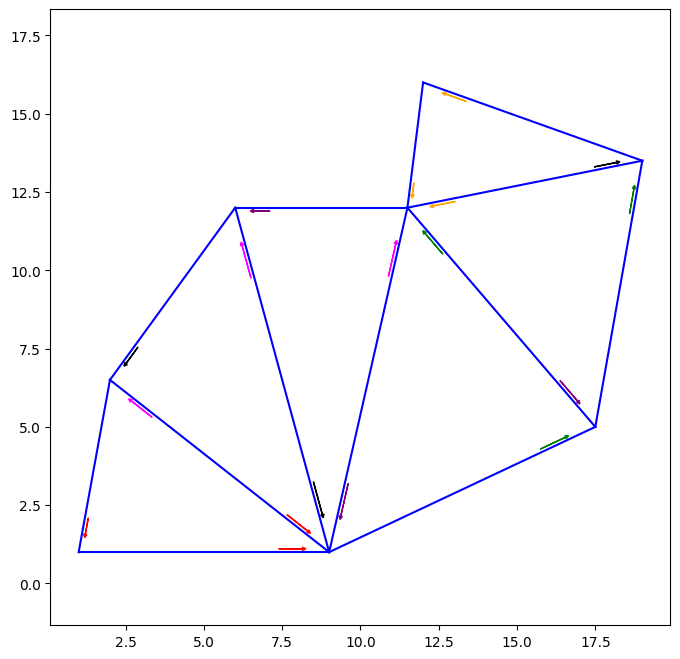

In [46]:
draw_halfedge_structure(he,mesh)

In [47]:
def apex_surroundings_basic(point, points, connections):
    surrounding = []
    for i,j in connections:
        if i == point:
            if j not in surrounding:
                surrounding.append(j)
            for a,b in connections:
                if a == j and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == j and a != point and a not in surrounding:
                    surrounding.append(a)
        elif j == point:
            if i not in surrounding:
                surrounding.append(i)
            for a,b in connections:
                if a == i and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == i and a != point and a not in surrounding:
                    surrounding.append(a)
    return surrounding

In [48]:
start_time = time.time()
sur = apex_surroundings_basic(2, p, con)
end_time = time.time()
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)
print(end_time-start_time)

[0, 1, 7, 6, 3, 4, 5]
[(1.0, 1.0), (2.0, 6.5), (6.0, 12.0), (11.5, 12.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0)]
4.124641418457031e-05


In [49]:
import copy

def triangle_surroundings_basic(tri_id, triangles):
    triangle = triangles[tri_id]
    surrounding = []
    for i,(t1,t2,t3) in enumerate(triangles):
        if i != tri_id and (t1 in triangle or t2 in triangle or t3 in triangle):
            if i not in surrounding:
                surrounding.append(i)
    res = copy.copy(surrounding)
    for j in surrounding:
        temp_triangle = triangles[j]
        for k,(t1,t2,t3) in enumerate(triangles):
            if k != tri_id and (t1 in temp_triangle or t2 in temp_triangle or t3 in temp_triangle):
                if k not in res:
                    res.append(k)
    return surrounding, res

In [50]:
tri = triangle_surroundings_basic(0,t)
print(tri)

([1, 2, 3], [1, 2, 3, 4, 5])


In [51]:
def apex_surroundings_halfedge(p,halfedges):
    #do pizdy jeszcze to troche jest
    surrounding = []
    hes = []
    for halfe in halfedges:
        if halfe.vertex.index == p:
            hes.append(halfe)
    if not hes:
        return surrounding
    for he in hes:
        he = he.next
        if he.vertex.index not in surrounding:
            while he:
                if he.vertex.index not in surrounding:
                    surrounding.append(he.vertex.index)
                he = he.next
                if he.vertex.index == p:
                    he = he.twin
    n = len(surrounding)
    for i in range(n):
        s = surrounding[i]
        hes = []
        for halfe in halfedges:
            if halfe.vertex.index == s:
                hes.append(halfe)
        if not hes:
            continue
        for he in hes:
            he = he.next
            if he.vertex.index not in surrounding:
                while he:
                    if he.vertex.index not in surrounding + [p]:
                        surrounding.append(he.vertex.index)
                    he = he.next
                    if he.vertex.index == s:
                        he = he.twin
                    
    return surrounding
    

In [52]:
start_time = time.time()
sur = apex_surroundings_halfedge(2, he)
end_time = time.time()
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)
print(end_time-start_time)

KeyboardInterrupt: 